# Détection des Attaques DDoS par l'Apprentissage Automatique


Ce code Python est une implémentation d'un système de détection des attaques **DDoS (Déni de Service Distribué)** en utilisant des techniques d'apprentissage automatique. Il suit un processus complet, depuis le chargement des données jusqu'à l'évaluation des performances des modèles.

**1. Importation des bibliothèques et chargement des données.**

**2.Analyse exploratoire des données (EDA):**


*   statistiques, distribution des étiquettes

*   valeurs manquantes
*   visualisation des caractéristiques.


**3. Prétraitement des données :**


*    séparation des caractéristiques

*   conversion des non numériques
*   alcul de la corrélation.


**4. Construction des modèles :**


*    Régression logistique

*   SVM
*   Random Forest


*   Gradient Boosting


**5. Validation croisée et optimisation des hyperparamètres pour la Forêt aléatoire**.

**6. Comparaison des performances des modèles.**

**7. Résumé des résultats et comparaison**




**Une attaque DDoS ?**

Une attaque DDoS (Déni de Service Distribué) est une forme d'attaque cybernétique dans laquelle un grand nombre de machines individuelles ou de dispositifs connectés sont utilisés pour saturer le trafic réseau ciblé, les serveurs ou les services en ligne.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [ ]:
data = pd.read_csv( r"dataset_sdn.csv")

In [ ]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451.0,0.0,UDP,3.0,143928631.0,3917.0,0.0,0.0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451.0,0.0,UDP,4.0,3842.0,3520.0,0.0,0.0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,1.0,3795.0,1242.0,0.0,0.0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,2.0,3688.0,1492.0,0.0,0.0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,3.0,3413.0,3665.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,10869,7,10.0.0.13,10.0.0.3,160093,8645022,263,918000000,2.640000e+11,3,...,601.0,1.0,TCP,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0
34870,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,1.0,6519255.0,147118518.0,0.0,0.0,0.0,1.0
34871,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,2.0,155781437.0,11136505.0,258.0,139.0,397.0,1.0
34872,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0


In [ ]:
data.shape

(34874, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34874 entries, 0 to 34873
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           34874 non-null  int64  
 1   switch       34874 non-null  int64  
 2   src          34874 non-null  object 
 3   dst          34874 non-null  object 
 4   pktcount     34874 non-null  int64  
 5   bytecount    34874 non-null  int64  
 6   dur          34874 non-null  int64  
 7   dur_nsec     34874 non-null  int64  
 8   tot_dur      34874 non-null  float64
 9   flows        34874 non-null  int64  
 10  packetins    34874 non-null  int64  
 11  pktperflow   34874 non-null  int64  
 12  byteperflow  34873 non-null  float64
 13  pktrate      34873 non-null  float64
 14  Pairflow     34873 non-null  float64
 15  Protocol     34873 non-null  object 
 16  port_no      34873 non-null  float64
 17  tx_bytes     34873 non-null  float64
 18  rx_bytes     34873 non-null  float64
 19  tx_k

In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,34874.000000,34874.000000,34874.000000,3.487400e+04,34874.000000,3.487400e+04,3.487400e+04,34874.000000,34874.000000,34874.000000,3.487300e+04,34873.000000,34873.000000,34873.000000,3.487300e+04,3.487300e+04,34873.000000,34367.000000,34367.000000,34873.000000
mean,7737.563830,3.757097,71783.890922,7.435293e+07,193.462121,5.145806e+08,1.939386e+11,3.591042,3612.210701,9901.420629,1.019585e+07,329.611447,0.036848,2.290569,7.255055e+07,7.259508e+07,1106.669544,1123.136061,2246.099572,0.519686
std,3867.655107,1.651699,40511.534240,4.386222e+07,120.432973,2.429714e+08,1.204360e+11,1.528418,2613.205202,6302.742911,6.855832e+06,210.038502,0.188391,1.055561,1.753323e+08,1.440341e+08,2893.348608,2343.080565,3396.015119,0.499619
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+06,2.000000,18.000000,-128767.000000,-1.372656e+08,-4293.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,3309.000000,3.000000,36001.750000,3.537746e+07,90.000000,3.260000e+08,9.086700e+10,2.000000,1931.000000,8314.000000,8.461040e+06,277.000000,0.000000,1.000000,3.649000e+03,1.492000e+03,0.000000,0.000000,0.000000,0.000000
50%,9936.000000,4.000000,72904.000000,7.596597e+07,190.000000,4.750000e+08,1.900000e+11,3.000000,1943.000000,9606.000000,9.853152e+06,320.000000,0.000000,2.000000,4.056000e+03,3.767000e+03,0.000000,0.000000,0.000000,1.000000
75%,11365.000000,5.000000,106636.000000,1.119407e+08,283.000000,7.370000e+08,2.830000e+11,4.000000,4440.000000,13526.000000,1.441872e+07,450.000000,0.000000,3.000000,6.329000e+03,9.284165e+07,0.000000,271.000000,3838.000000,1.000000
max,12265.000000,8.000000,160117.000000,1.471280e+08,477.000000,9.970000e+08,4.780000e+11,11.000000,8803.000000,18758.000000,1.478919e+07,625.000000,1.000000,4.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [ ]:
data.label.unique()

array([ 0.,  1., nan])

In [ ]:
data.label.value_counts()

label
1.0    18123
0.0    16750
Name: count, dtype: int64

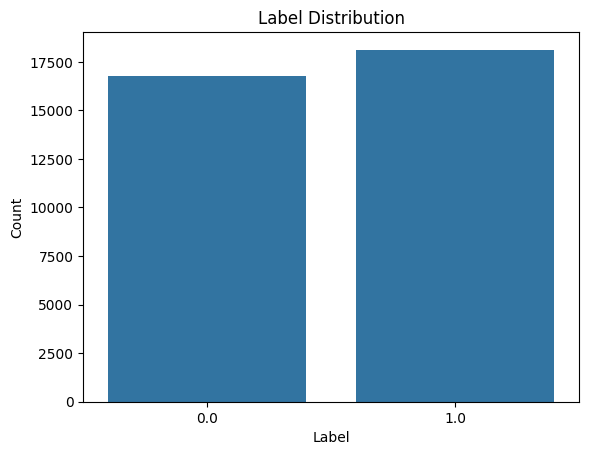

In [ ]:
label_counts = data['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

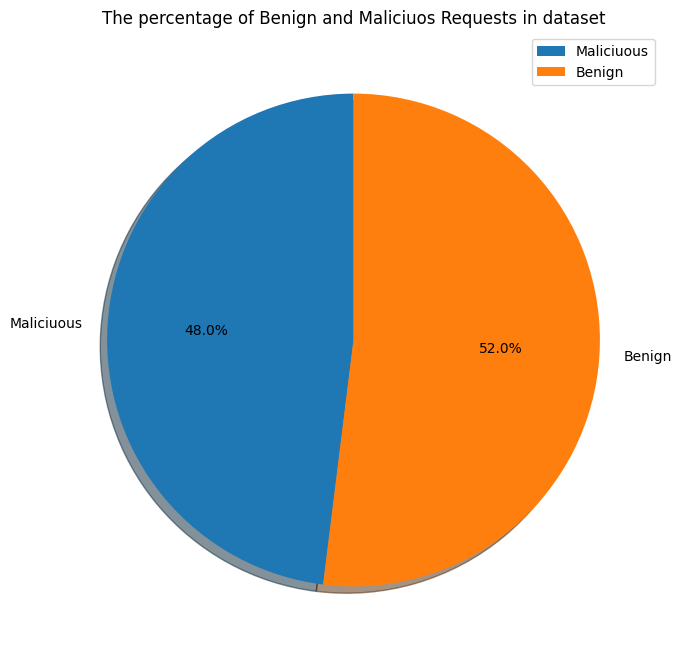

In [ ]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [ ]:
data.isnull()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Features which has NuLL values')

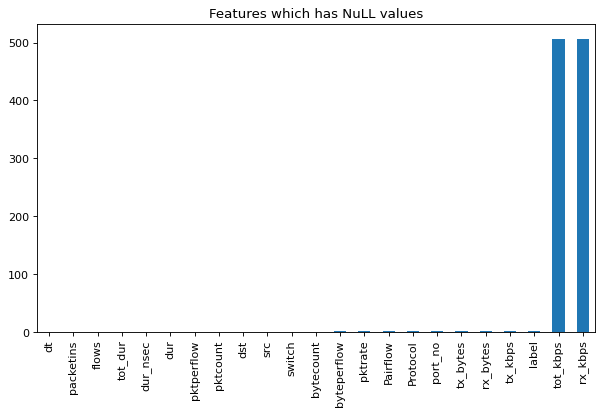

In [ ]:
# vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      1
pktrate          1
Pairflow         1
Protocol         1
port_no          1
tx_bytes         1
rx_bytes         1
tx_kbps          1
rx_kbps        507
tot_kbps       507
label            1
dtype: int64

In [ ]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
numeric_df

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310.0,451.0,0.0,3.0,143928631.0,3917.0,0.0,0.0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046.0,451.0,0.0,4.0,3842.0,3520.0,0.0,0.0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,1.0,3795.0,1242.0,0.0,0.0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,2.0,3688.0,1492.0,0.0,0.0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,3.0,3413.0,3665.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,10869,7,160093,8645022,263,918000000,2.640000e+11,3,4357,18037,973998.0,601.0,1.0,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0
34870,10869,7,79193,4593194,254,628000000,2.550000e+11,3,4357,9018,523044.0,300.0,1.0,1.0,6519255.0,147118518.0,0.0,0.0,0.0,1.0
34871,10869,7,79193,4593194,254,628000000,2.550000e+11,3,4357,9018,523044.0,300.0,1.0,2.0,155781437.0,11136505.0,258.0,139.0,397.0,1.0
34872,10869,7,79193,4593194,254,628000000,2.550000e+11,3,4357,9018,523044.0,300.0,1.0,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0


In [ ]:
object_df

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP
...,...,...,...
34869,10.0.0.13,10.0.0.3,TCP
34870,10.0.0.3,10.0.0.13,TCP
34871,10.0.0.3,10.0.0.13,TCP
34872,10.0.0.3,10.0.0.13,TCP


Text(0.5, 1.0, 'Number of all reqests')

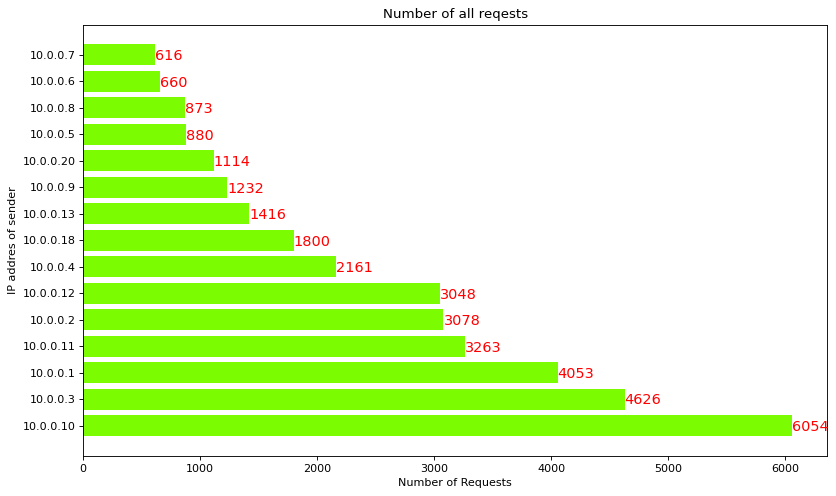

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

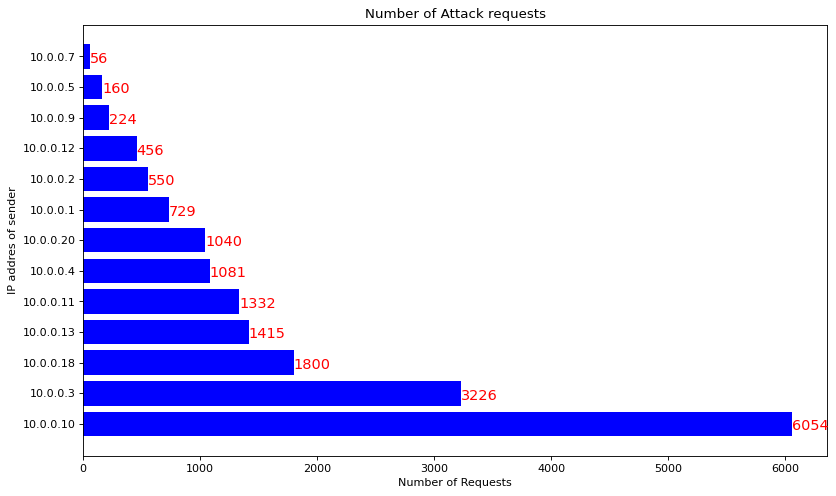

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

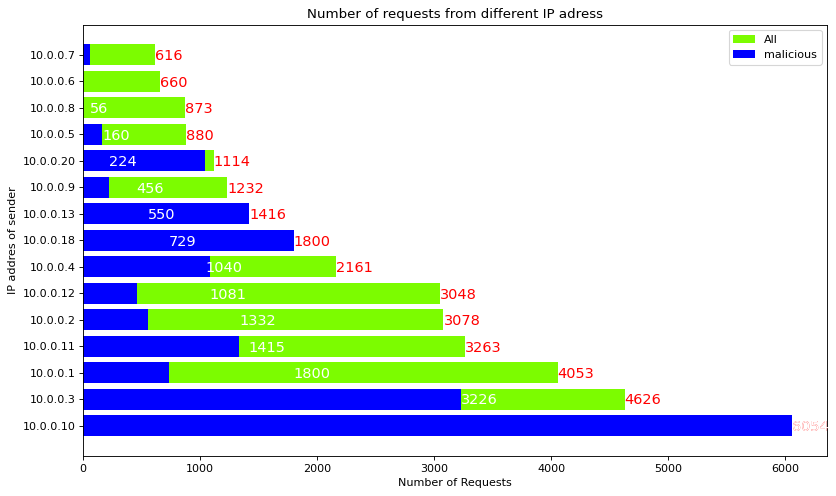

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

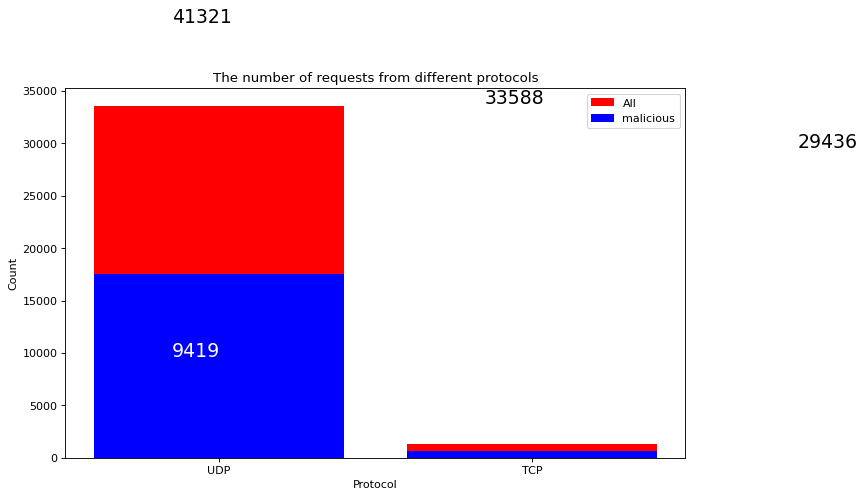

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:
df = data.copy()

In [ ]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451.0,0.0,UDP,3.0,143928631.0,3917.0,0.0,0.0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451.0,0.0,UDP,4.0,3842.0,3520.0,0.0,0.0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,1.0,3795.0,1242.0,0.0,0.0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,2.0,3688.0,1492.0,0.0,0.0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451.0,0.0,UDP,3.0,3413.0,3665.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,10869,7,10.0.0.13,10.0.0.3,160093,8645022,263,918000000,2.640000e+11,3,...,601.0,1.0,TCP,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0
34870,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,1.0,6519255.0,147118518.0,0.0,0.0,0.0,1.0
34871,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,2.0,155781437.0,11136505.0,258.0,139.0,397.0,1.0
34872,10869,7,10.0.0.3,10.0.0.13,79193,4593194,254,628000000,2.550000e+11,3,...,300.0,1.0,TCP,3.0,4621109.0,8664161.0,139.0,258.0,397.0,1.0


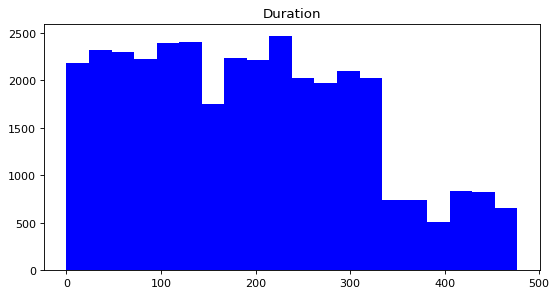

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()


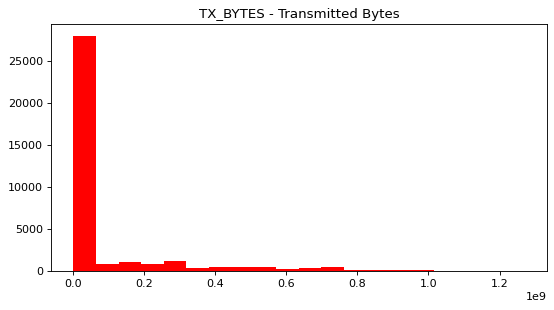

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

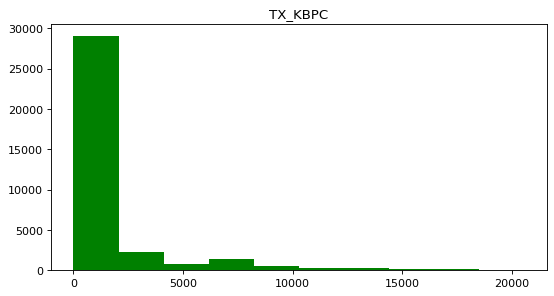

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

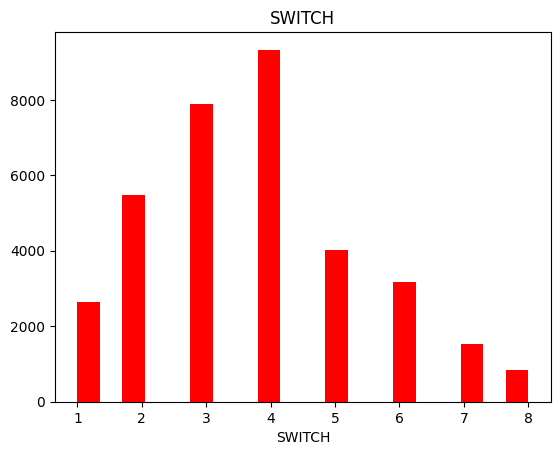

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

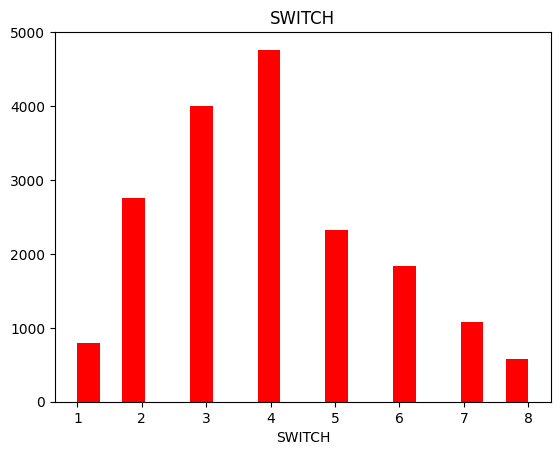

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [ ]:
class Model:
    global y

    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

        self.accuracy_lr = 0
        self.accuracy_svm = 0
        self.accuracy_rf = 0
        self.accuracy_gbc = 0

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)

            results_lr.append({'solver': solver, 'accuracy': f"{round(accuracy_lr * 100, 2)}%",
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})

            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print(f"Accuracy of LR model is: {round(accuracy_lr * 100, 2)}%", '\n')
        print("########################################################################")
        print('Best solver is:', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        self.accuracy_lr = accuracy_lr

    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel": kernel, "accuracy": f"{round(accuracy_svm * 100, 2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0), 2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm, 2) * 100}%", '\n')
        print("########################################################################")
        print('Best kernel is:', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_svm = accuracy_svm

    def RandomForest(self):
        start_time = time.time()

        param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 3, 4, 5, 6]  # Include 'None' for unlimited depth
}


        rf_base = RandomForestClassifier(criterion='gini',
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)

        rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        rf_search.fit(self.X_train, self.y_train)

        best_rf = rf_search.best_estimator_
        predicted_rf = best_rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_rf = accuracy_rf

    def GradientBoost(self):
        start_time = time.time()
        gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
        gbc.fit(self.X_train, self.y_train)

        predicted_gbc = gbc.predict(self.X_test)
        accuracy_gbc = accuracy_score(self.y_test, predicted_gbc)
        print(f"Accuracy of Gradient Boosting model is: {round(accuracy_gbc * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbc, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_gbc = accuracy_gbc

    def plot_accuracy(self, accuracies, model_names):
        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color='blue')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of Different Models')
        plt.ylim(0, 100)  # Set y-axis limit to be between 0 and 100 (percentage)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_models(self):
        self.LogisticRegression()
        self.SupportVectorMachine()
        self.RandomForest()
        self.GradientBoost()

        model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting']
        accuracies = [self.accuracy_lr * 100, self.accuracy_svm * 100, self.accuracy_rf * 100, self.accuracy_gbc * 100]

        self.plot_accuracy(accuracies, model_names)


In [ ]:
df = data.copy()
df = df.dropna()

In [ ]:
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label

In [ ]:
X.head()

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310.0,451.0,0.0,UDP,3.0,143928631.0,3917.0,0.0,0.0,0.0
1,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046.0,451.0,0.0,UDP,4.0,3842.0,3520.0,0.0,0.0,0.0
2,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,UDP,1.0,3795.0,1242.0,0.0,0.0,0.0
3,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,UDP,2.0,3688.0,1492.0,0.0,0.0,0.0
4,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244.0,451.0,0.0,UDP,3.0,3413.0,3665.0,0.0,0.0,0.0


In [ ]:
# Convert non-numeric columns to numeric if possible
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Calculate the absolute correlation matrix
abs_corr_matrix = X_numeric.corr().abs()

# Print or use the absolute correlation matrix as needed
print(abs_corr_matrix)


               switch  pktcount  bytecount       dur  dur_nsec   tot_dur  \
switch       1.000000  0.003536   0.017054  0.034583  0.043345  0.034332   
pktcount     0.003536  1.000000   0.968773  0.917840  0.096781  0.917996   
bytecount    0.017054  0.968773   1.000000  0.889418  0.093759  0.889599   
dur          0.034583  0.917840   0.889418  1.000000  0.086763  0.999993   
dur_nsec     0.043345  0.096781   0.093759  0.086763  1.000000  0.089910   
tot_dur      0.034332  0.917996   0.889599  0.999993  0.089910  1.000000   
flows        0.128780  0.105699   0.147773  0.190384  0.125606  0.190090   
packetins    0.247499  0.090843   0.081301  0.086800  0.050463  0.086629   
pktperflow   0.035709  0.143637   0.130227  0.005972  0.036428  0.006139   
byteperflow  0.050436  0.145459   0.194996  0.015976  0.033732  0.016159   
pktrate      0.035772  0.143431   0.130022  0.005756  0.036414  0.005923   
Pairflow     0.025799  0.058908   0.226425  0.079852  0.006107  0.079972   
Protocol    

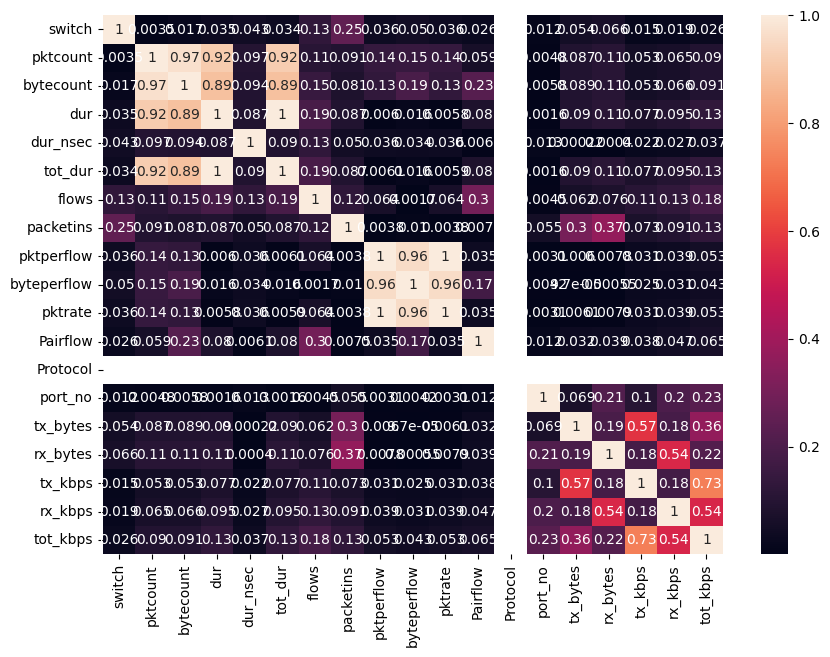

In [ ]:
# Convert non-numeric columns to numeric if possible
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Calculate the absolute correlation matrix
abs_corr_matrix = X_numeric.corr().abs()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(abs_corr_matrix, annot=True, ax=ax)
plt.show()


In [ ]:
def RandomForest(self):
    start_time = time.time()

    param_grid = {
        'n_estimators': [100, 200, 500],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 3, 4, 5, 6]  # Include 'None' for unlimited depth
    }

    rf_base = RandomForestClassifier(criterion='gini',
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)

    rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    rf_search.fit(self.X_train, self.y_train)

    best_rf = rf_search.best_estimator_
    predicted_rf = best_rf.predict(self.X_test)
    accuracy_rf = accuracy_score(self.y_test, predicted_rf)

    print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
    print("########################################################################")
    print(classification_report(predicted_rf, self.y_test))
    print("########################################################################")

    print("--- %s seconds ---" % (time.time() - start_time))
    self.accuracy_rf = accuracy_rf


In [ ]:
X = pd.get_dummies(X)

In [ ]:
M = Model(X)

In [ ]:
M.RandomForest()

Fitting 5 folds for each of 135 candidates, totalling 675 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF model is: 100.0% 

########################################################################
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5002
         1.0       1.00      1.00      1.00      5309

    accuracy                           1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311

########################################################################
--- 2080.1735575199127 seconds ---


In [ ]:
#M.LogisticRegression()

In [ ]:
#M.SupportVectorMachine()

In [ ]:
#M.RandomForest()

In [ ]:
#M.GradientBoost()

Accuracy of LR model is: 96.39% 

########################################################################
Best solver is: newton-cg
########################################################################
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      5004
         1.0       0.96      0.97      0.96      5307

    accuracy                           0.96     10311
   macro avg       0.96      0.96      0.96     10311
weighted avg       0.96      0.96      0.96     10311
 

########################################################################
--- 2.421760082244873 seconds --- time for LogisticRegression
Accuracy: 97.42%
######################################################################
Accuracy: 98.52%
######################################################################
Accuracy: 99.31%
######################################################################
Accuracy: 88.85%
#################################################

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF model is: 100.0% 

########################################################################
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5002
         1.0       1.00      1.00      1.00      5309

    accuracy                           1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311

########################################################################
--- 2044.8312923908234 seconds ---
Accuracy of Gradient Boosting model is: 100.0% 

########################################################################
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5002
         1.0       1.00      1.00      1.00      5309

    accuracy                           1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311

#########

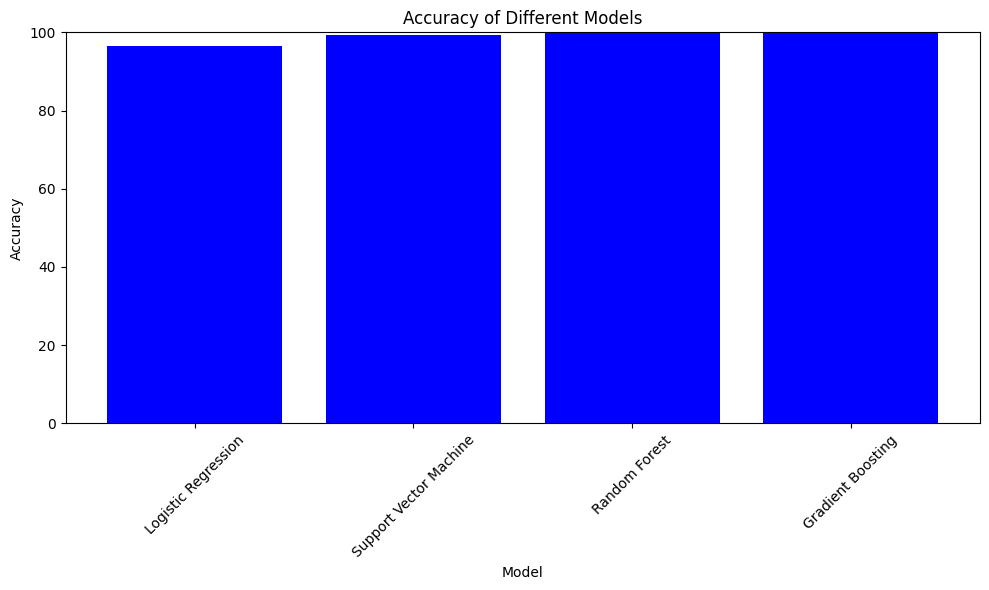

In [ ]:
M.run_models()